In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # K = 3
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [4]:
from sklearn.metrics import accuracy_score

for k in [1, 3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"K = {k}, Accuracy = {acc:.4f}")


K = 1, Accuracy = 0.9667
K = 3, Accuracy = 1.0000
K = 5, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 9, Accuracy = 1.0000


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



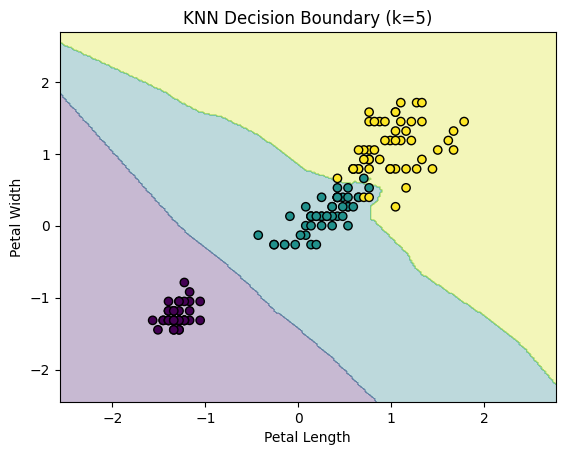

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use only 2 features
X2 = iris.data[:, [2, 3]]
X2_scaled = StandardScaler().fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)

# Create mesh grid
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Decision Boundary (k=5)')
plt.show()
